# Descretization Task
### Senario 10

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_table('capture20110818.pcap.netflow.labeled',delim_whitespace=True) 
print(type(df))
df = df.iloc[:,:-5]
df.columns = ['Date','Time','Durat','Prot','Src IP Addr:Port','Dir','Dst IP Addr:Port','Flags','Tos','Packets','Bytes','Flows','Label']
LEN_DF = len(df)
print(LEN_DF)
#Seperate address and port
addr = []
port = []
for i in df['Src IP Addr:Port']:
    try:
        s = i.split(':', 1)
        addr.append(s[0])
        port.append(s[1])
    except:
        port.append('Null')

df['Src_address'] = addr
df['Port'] = port

## Factorize Protocol
pro_fac,uniques  = pd.factorize(df['Prot'])
df['Prot_fac'] = pro_fac

flag_fac,u = pd.factorize(df['Flags'])
df['Flags_fac'] = flag_fac

print(df.head())

<class 'pandas.core.frame.DataFrame'>
5180851
         Date          Time  Durat Prot      Src IP Addr:Port Dir  \
0  2011-08-18  10:19:13.328  0.002  TCP   147.32.86.166:33426  ->   
1  2011-08-18  10:19:13.328  4.995  UDP     82.39.2.249:41915  ->   
2  2011-08-18  10:19:13.329  4.996  UDP    147.32.84.59:43087  ->   
3  2011-08-18  10:19:13.330  0.000  TCP   147.32.86.166:42020  ->   
4  2011-08-18  10:19:13.330  0.000  TCP  212.24.150.110:25443  ->   

       Dst IP Addr:Port  Flags  Tos  Packets    Bytes  Flows       Label  \
0  212.24.150.110:25443  FRPA_    0        4      321      1  Background   
1    147.32.84.59:43087    INT    0      617    40095      1  Background   
2     82.39.2.249:41915    INT    0     1290  1909200      1  Background   
3     147.32.192.34:993     A_    0        1       66      1  Background   
4   147.32.86.166:33426   FPA_    0        2      169      1  Background   

      Src_address   Port  Prot_fac  Flags_fac  
0   147.32.86.166  33426         0

In [3]:
# unique protocol
print(uniques)

# unique flags
print(u)

Index(['TCP', 'UDP', 'ICMP', 'PIM', 'RTP', 'ARP', 'IPX/SPX', 'RTCP', 'IGMP',
       'IPV6-ICMP', 'IPV6', 'ESP', 'LLC', 'UDT'],
      dtype='object')
Index(['FRPA_', 'INT', 'A_', 'FPA_', 'PA_', 'URP', '_FSPA', 'S_', 'SPA_',
       'RA_', 'FA_', 'SRPA_', 'R_', 'FSPA_', 'RED', 'SA_', 'URN', 'ECO',
       '_FSA', 'FSRPA_', 'URFIL', 'URH', 'FRA_', 'CON', 'FSA_', 'RPA_',
       '_FSRPA', 'ECR', 'FS_', 'TXD', 'SEC_', 'SR_', 'FSRA_', 'F_', 'URHPRO',
       'NNS', 'SRA_', 'SRC', '_FSRA', 'AC_', 'NRA', 'SPAC_', 'PAC_', 'FSAU_',
       'FSRPAC_', 'URO', 'FRPAC_', 'RC_', 'URNPRO', 'FSPAC_', 'URF', 'FPAC_',
       'FSR_', '_FSPAC', 'FSPAEC_', 'FAU_', 'MAS', 'TST', 'IRR', 'RTS', 'RTA',
       'IRQ', 'UNK', 'MSR', 'TSR', 'SEC', 'ROB', 'MRQ', 'IAH', 'DNQ', 'PTB',
       'PAR', 'WAY', 'PHO', '___', 'AHA', 'NRS', 'MHR', 'UR', 'NNA', 'MRP',
       'TRC', 'DCE', 'SKP', 'DNP', 'URPRE', 'URS', 'URNU', 'URCUT', 'URISO',
       'URHTOS', 'URHU', 'FRAC_', 'SRC_', 'RPA_FRPA'],
      dtype='object')


In [4]:
# Extract records labeled as Botnet

infected_df = df.ix[df['Label']=='Botnet',:]
print(len(infected_df))
infected_df.index = range(len(infected_df))
print(infected_df.head())

legit_df = df.ix[df['Label']=='LEGITIMATE',:]
legit_df.index = range(len(legit_df))
print(len(legit_df))

/Users/lizy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


323441
         Date          Time  Durat Prot      Src IP Addr:Port Dir  \
0  2011-08-18  10:20:40.906    0.0  TCP  58.188.108.203:10166  ->   
1  2011-08-18  10:37:58.448    0.0  UDP    147.32.84.165:1025  ->   
2  2011-08-18  10:37:58.448    0.0  UDP        147.32.80.9:53  ->   
3  2011-08-18  10:38:00.695    0.0  UDP    147.32.84.165:1025  ->   
4  2011-08-18  10:38:00.705    0.0  UDP        147.32.80.9:53  ->   

      Dst IP Addr:Port Flags  Tos  Packets  Bytes  Flows   Label  \
0  147.32.84.208:44011    S_    0        1     66      1  Botnet   
1       147.32.80.9:53   INT    0        1     64      1  Botnet   
2   147.32.84.165:1025   INT    0        1    139      1  Botnet   
3       147.32.80.9:53   INT    0        1     87      1  Botnet   
4   147.32.84.165:1025   INT    0        1    503      1  Botnet   

      Src_address   Port  Prot_fac  Flags_fac  
0  58.188.108.203  10166         0          7  
1   147.32.84.165   1025         1          1  
2     147.32.80.9     53 

In [5]:
# Unique infected protocol
print(np.unique(infected_df['Prot']))
# Unique legitimate protocol
print(np.unique(legit_df['Prot']))
print(np.unique(infected_df['Tos']))

['ICMP' 'TCP' 'UDP']
['ICMP' 'TCP' 'UDP']
[0]


/Users/lizy/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


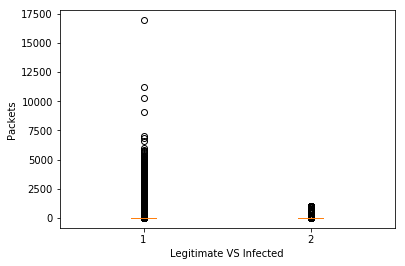

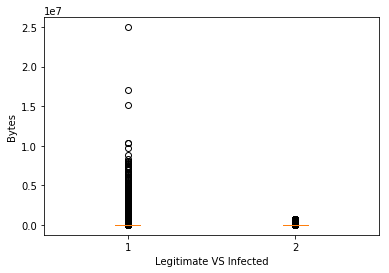

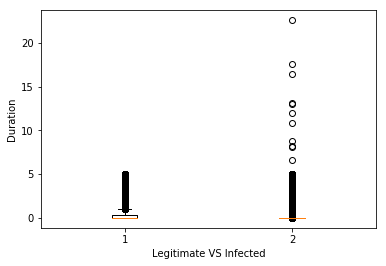

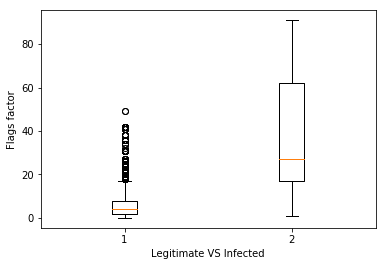

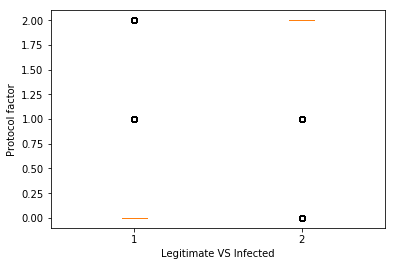

In [6]:
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline 

fig = plt.figure()
ax = fig.add_subplot(111)
pack = [legit_df['Packets'], infected_df['Packets']]
ax.boxplot(pack)
ax.set_xlabel('Legitimate VS Infected')
ax.set_ylabel('Packets')

fig = plt.figure()
ax = fig.add_subplot(111)
byte = [legit_df['Bytes'], infected_df['Bytes']]
ax.boxplot(byte)
ax.set_xlabel('Legitimate VS Infected')
ax.set_ylabel('Bytes')

fig = plt.figure()
ax = fig.add_subplot(111)
durat = [legit_df['Durat'], infected_df['Durat']]
ax.boxplot(durat)
ax.set_xlabel('Legitimate VS Infected')
ax.set_ylabel('Duration')
plt.savefig("screenshot/duration_comp.png")

fig = plt.figure()
ax = fig.add_subplot(111)
Flags_fac = [legit_df['Flags_fac'], infected_df['Flags_fac']]
ax.boxplot(Flags_fac)
ax.set_xlabel('Legitimate VS Infected')
ax.set_ylabel('Flags factor')
plt.savefig("screenshot/flags_comp.png")

fig = plt.figure()
ax = fig.add_subplot(111)
Prot_fac = [legit_df['Prot_fac'], infected_df['Prot_fac']]
ax.boxplot(Prot_fac)
ax.set_xlabel('Legitimate VS Infected')
ax.set_ylabel('Protocol factor')
plt.savefig("screenshot/prot_comp.png")



# durat = [df['Durat'], infected_df['Durat']]
# # multiple box plots on one figure
# plt.figure()
# plt.boxplot(durat)
# plt.show()

### Select one infected host to further investigate

In [12]:
select = infected_df['Src_address'][1]

host = infected_df.ix[infected_df['Src_address'] == select,:]
print(len(host))

19889


In [9]:
print(host[:10])

          Date          Time  Durat Prot Src IP Addr:Port Dir  \
2   2011-08-18  10:37:58.448    0.0  UDP   147.32.80.9:53  ->   
4   2011-08-18  10:38:00.705    0.0  UDP   147.32.80.9:53  ->   
8   2011-08-18  10:38:03.266    0.0  UDP   147.32.80.9:53  ->   
12  2011-08-18  10:43:13.002    0.0  UDP   147.32.80.9:53  ->   
14  2011-08-18  10:43:15.269    0.0  UDP   147.32.80.9:53  ->   
18  2011-08-18  10:43:18.180    0.0  UDP   147.32.80.9:53  ->   
37  2011-08-18  10:47:36.807    0.0  UDP   147.32.80.9:53  ->   
39  2011-08-18  10:47:39.090    0.0  UDP   147.32.80.9:53  ->   
43  2011-08-18  10:47:41.782    0.0  UDP   147.32.80.9:53  ->   
46  2011-08-18  10:48:31.962    0.0  UDP   147.32.80.9:53  ->   

      Dst IP Addr:Port Flags  Tos  Packets  Bytes  Flows   Label  Src_address  \
2   147.32.84.165:1025   INT    0        1    139      1  Botnet  147.32.80.9   
4   147.32.84.165:1025   INT    0        1    503      1  Botnet  147.32.80.9   
8   147.32.84.165:1025   INT    0        

In [27]:
from sklearn.preprocessing import normalize

def norm(x):
    normalized = (x-min(x))/(max(x)-min(x))
    return normalized

package = norm(np.asarray(host['Packets']))
byte = norm(np.asarray(host['Bytes']))
flag = norm(np.asarray(host['Flags_fac']))
protocol = norm(np.asarray(host['Prot_fac']))

import  plotly
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='Lizy', api_key='9ZtK4mJiAnFZCCIriJun')


trace0 = go.Box(
    y=package,
    name = 'Packets',
    marker = dict(
        color = 'rgb(135, 206, 235)',
    )
)
trace1 = go.Box(
    y=byte,
    name = 'Bytes',
    marker = dict(
        color = 'rgb(100, 149, 237)',
    )
)
trace3 = go.Box(
    y=protocol,
    name = 'Protocol factor',
    marker = dict(
        color = 'rgb(0, 191, 255)',
    )
)
trace2 = go.Box(
    y=flag,
    name = 'Flags factor',
    marker = dict(
        color = 'rgb(30, 144, 255)',
    )
)

data = [trace0, trace1,trace2, trace3]
plotly.plotly.iplot(data)

# fig = plt.figure()
# ax = fig.add_subplot(111)
# feature = [package,byte,flag,protocol]
# ax.boxplot(feature)
# ax.set_xlabel(['Packets','Bytes','Flags_fac','Prot_fac'])
# ax.set_ylabel('Normolized value')

In [39]:
# !pip install plotly

In [15]:
## discretize the selected two features -- Flags factor & Protocol factor

print('Protocol:')
protocol = np.unique(df['Prot'].values)
LEN_PRO = len(protocol) 
print(LEN_PRO)
print(protocol)

print('Flags:')
flags = np.unique(df['Flags'].values)
LEN_FLAG = len(flags)
print(LEN_FLAG)
print(flags)


def discretize(data,LEN_PRO,LEN_FLAG):

    space_size = LEN_PRO*LEN_FLAG
    length = [LEN_PRO,LEN_FLAG]
    code = 0
    for i in range(2):
        fac = space_size/length[i]
        code = code + data.ix[:,i]*fac
        space_size = fac
    return code

code = discretize(df[['Prot_fac','Flags_fac']],LEN_PRO,LEN_FLAG)
discre_feature = pd.DataFrame({'code':code,'label':df.ix[:,'Label']})
print(len(discre_feature))
print(discre_feature.head())

Protocol:
14
['ARP' 'ESP' 'ICMP' 'IGMP' 'IPV6' 'IPV6-ICMP' 'IPX/SPX' 'LLC' 'PIM' 'RTCP'
 'RTP' 'TCP' 'UDP' 'UDT']
Flags:
95
['AC_' 'AHA' 'A_' 'CON' 'DCE' 'DNP' 'DNQ' 'ECO' 'ECR' 'FAU_' 'FA_' 'FPAC_'
 'FPA_' 'FRAC_' 'FRA_' 'FRPAC_' 'FRPA_' 'FSAU_' 'FSA_' 'FSPAC_' 'FSPAEC_'
 'FSPA_' 'FSRA_' 'FSRPAC_' 'FSRPA_' 'FSR_' 'FS_' 'F_' 'IAH' 'INT' 'IRQ'
 'IRR' 'MAS' 'MHR' 'MRP' 'MRQ' 'MSR' 'NNA' 'NNS' 'NRA' 'NRS' 'PAC_' 'PAR'
 'PA_' 'PHO' 'PTB' 'RA_' 'RC_' 'RED' 'ROB' 'RPA_' 'RPA_FRPA' 'RTA' 'RTS'
 'R_' 'SA_' 'SEC' 'SEC_' 'SKP' 'SPAC_' 'SPA_' 'SRA_' 'SRC' 'SRC_' 'SRPA_'
 'SR_' 'S_' 'TRC' 'TSR' 'TST' 'TXD' 'UNK' 'UR' 'URCUT' 'URF' 'URFIL' 'URH'
 'URHPRO' 'URHTOS' 'URHU' 'URISO' 'URN' 'URNPRO' 'URNU' 'URO' 'URP'
 'URPRE' 'URS' 'WAY' '_FSA' '_FSPA' '_FSPAC' '_FSRA' '_FSRPA' '___']


/Users/lizy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



5180851
   code       label
0   0.0  Background
1  96.0  Background
2  96.0  Background
3   2.0  Background
4   3.0  Background


In [16]:
legitimate = discre_feature.ix[discre_feature['label'] == 'LEGITIMATE',:]
background = discre_feature.ix[discre_feature['label'] == 'Background',:]
infected = discre_feature.ix[discre_feature['label'] == 'Botnet',:]
print(str(len(legitimate)),str(len(background)),str(len(infected)))

/Users/lizy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



321917 4535493 323441


/Users/lizy/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



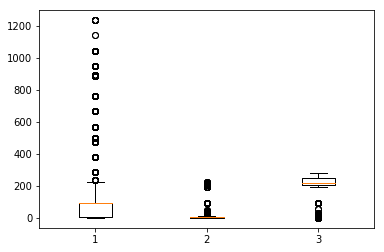

In [64]:
data = [legitimate['code'],infected['code']]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.savefig("screenshot/q3_comp.png")
plt.show()


In [26]:
import  plotly
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='Lizy', api_key='9ZtK4mJiAnFZCCIriJun')


trace0 = go.Box(
    y=legitimate['code'],
    name = 'Legitimate host',
    marker = dict(
        color = 'rgb(135, 206, 235)',
    )
)
trace1 = go.Box(
    y=infected['code'],
    name = 'Infected host',
    marker = dict(
        color = 'rgb(100, 149, 237)',
    )
)


data = [trace0, trace1]
plotly.plotly.iplot(data)


/Users/lizy/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:224: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [25]:
import plotly.figure_factory as ff
import plotly.plotly as py

hist_data = [legitimate['code'], infected['code']]

group_labels = ['Legitimate host', 'Infected host']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig, filename='Distplot with Legitimate and Infected hosts')

/Users/lizy/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:224: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



The draw time for this plot will be slow for all clients.


/Users/lizy/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long

